# Imports

##### General imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
import networkx as nx

##### Import from flatland environment 

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

##### Import from our framework

In [4]:
from src.graph import NetworkGraph
from src.flows import TimeNetwork

# Test of time expanded network

##### Create a flatland network

In [11]:
number_agents = 3

size_side = 5
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()
matrix_rail = np.array(env.rail.grid.tolist())
flatlandNetwork = NetworkGraph(matrix_rail,[(0,1)],[(1,0)])

cycles detected in NetworkGraph, this may be due to the fact that endpoint can be used to do 180 turn


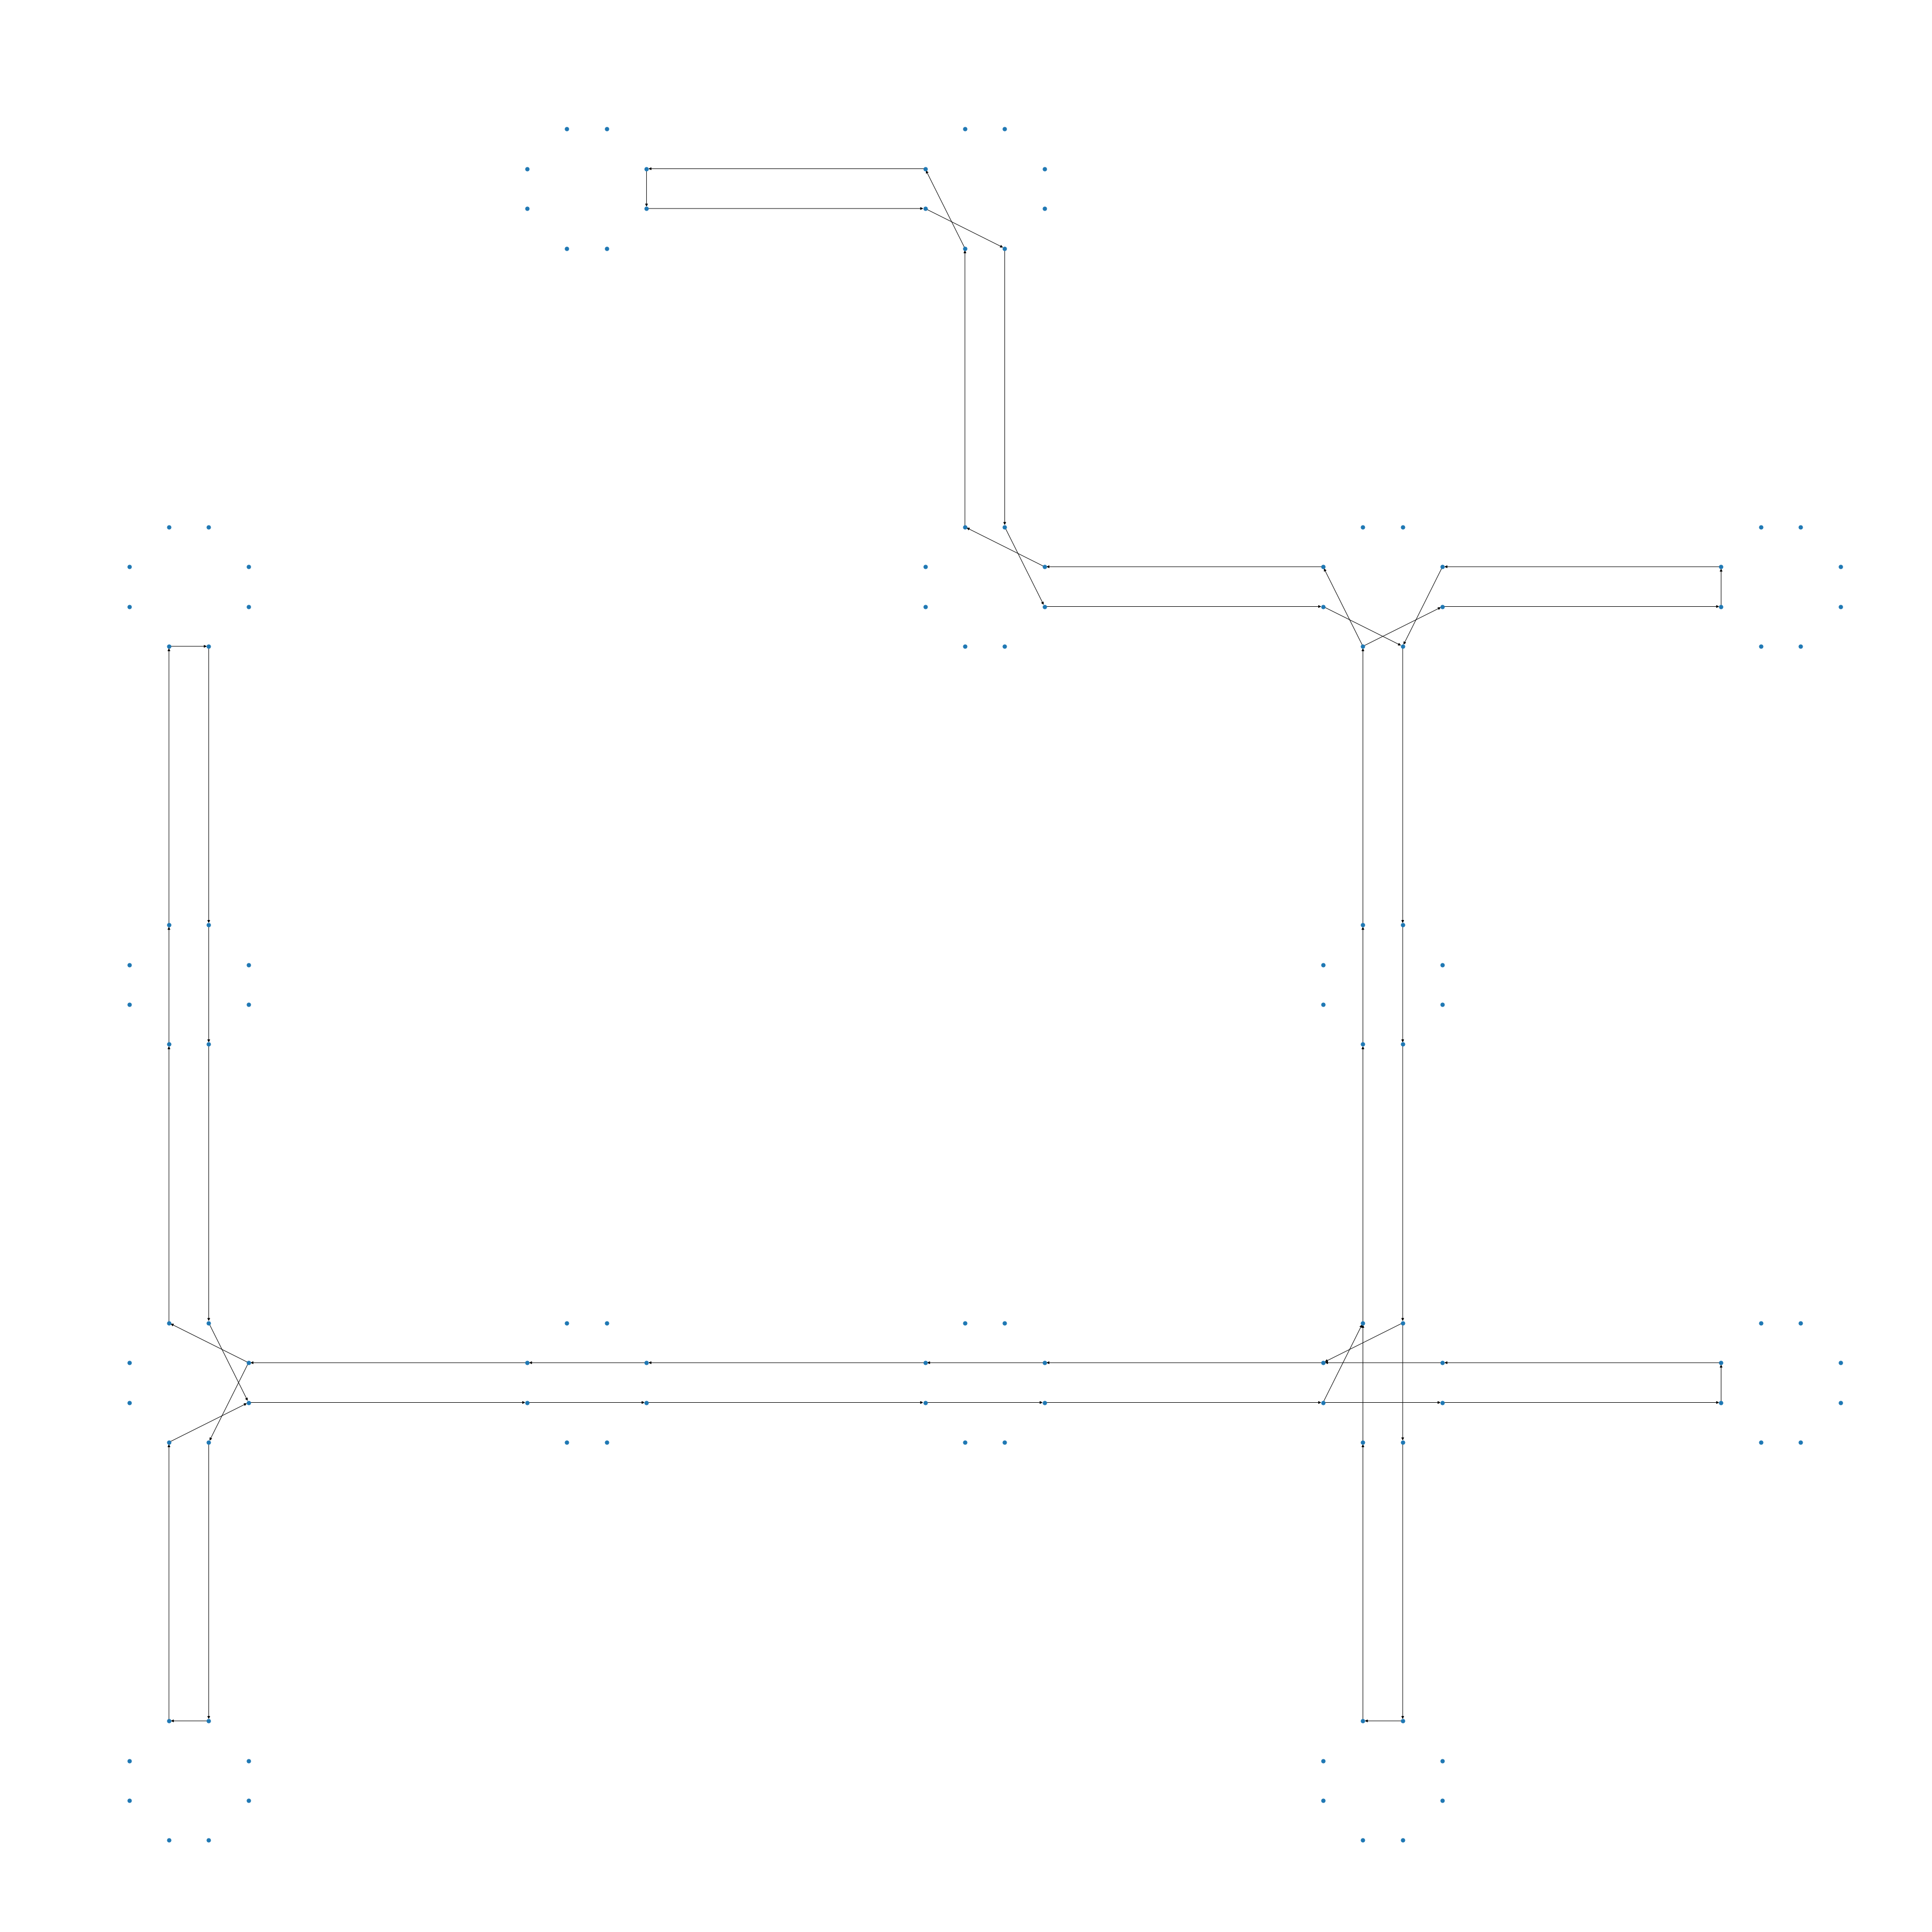

In [12]:
flatlandNetwork.show(jitter=0.1)

##### create a time expanded network

In [17]:
TestNetworkTime = TimeNetwork(flatlandNetwork, depth=4,flatland=False)

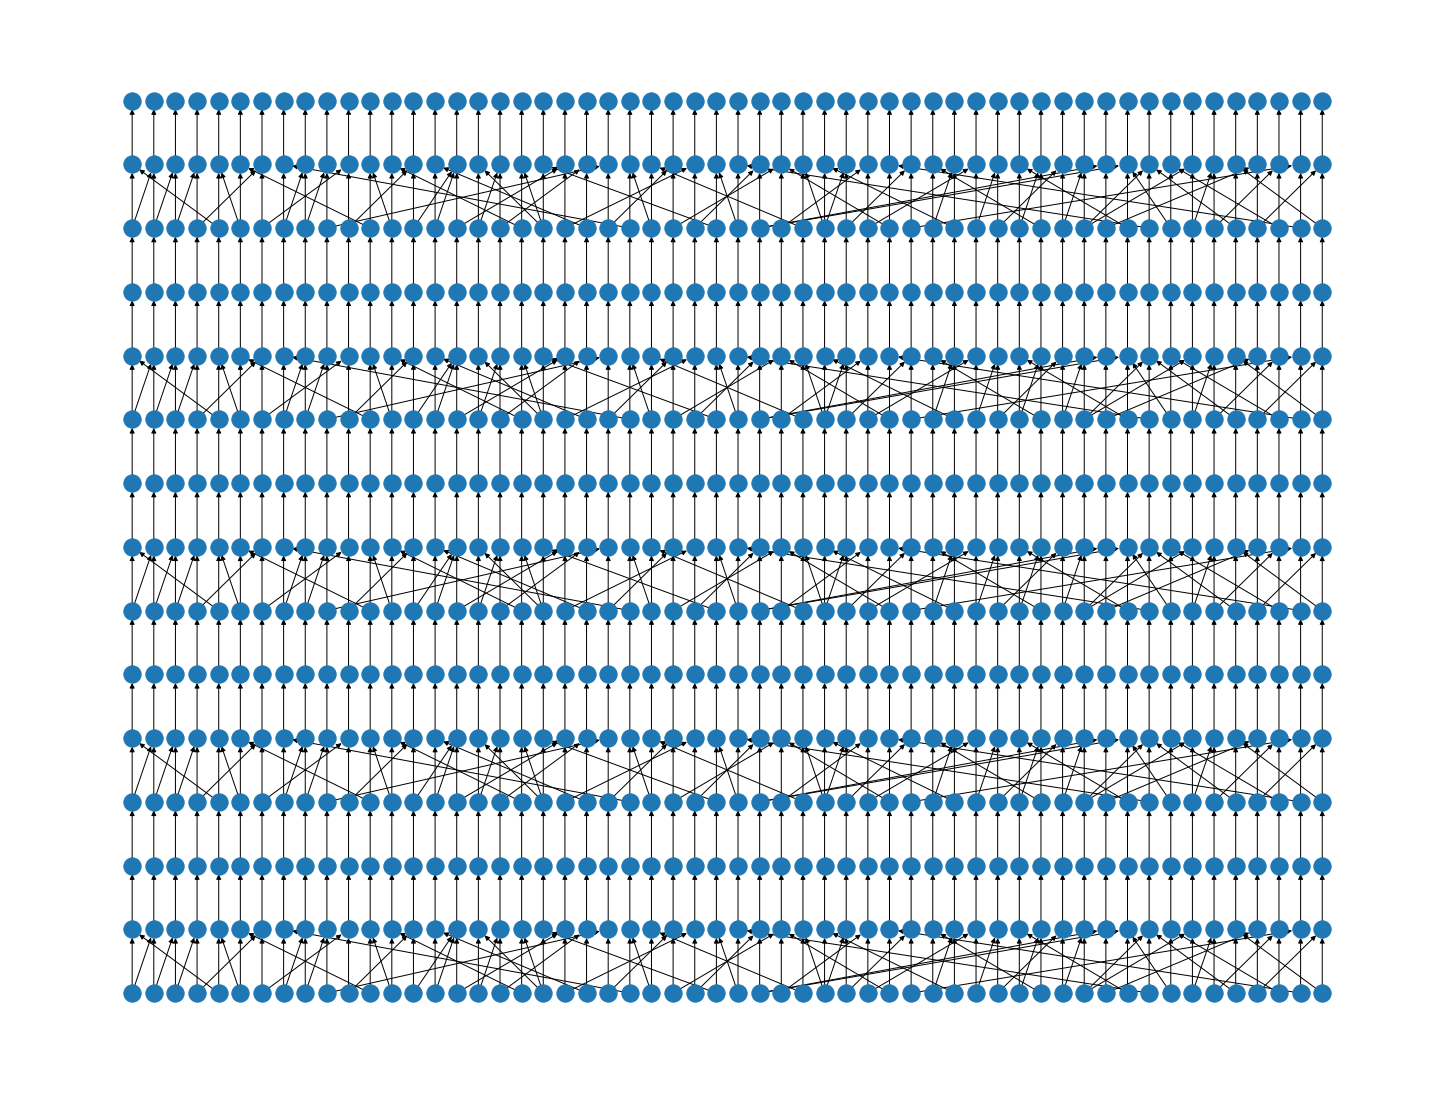

In [18]:
TestNetworkTime.show()